# Welcome to the tutorial on OpenCV

---

### In this document, we'll talk about the following:
- OpenCV

## OpenCV
---

[OpenCV](https://opencv.org/) (Open Source Computer Vision Library) is an open-source BSD-licensed library that includes several hundreds of computer vision algorithms. It helps us in performing various operations on images very easily. It was originally developed by Intel in 1999.

We import OpenCV with the following line:

In [2]:
import cv2

We also include other packages which we'll be using soon

In [3]:
import numpy as np
from matplotlib import pyplot as plt

### Some frequently used functions of OpenCV are:

#### `cv2.imread(path [, flag])`
This method loads an image from the specified file as a NumPy array (we will learn about this soon!) with each cell as a pixel.
##### Parameters
**path**: A string representing the path of the image to be read.  
**flag (optional)**: It specifies the way in which image should be read. It’s default value is `cv2.IMREAD_COLOR`. We'll see more modes soon.
##### Returns
This method returns an image that is loaded from the specified file.

*If unable to load an image, it will return an empty numpy array*

##### Flags
Flags belong to the enumeration `cv::ImreadModes`. Some of the several flags available are:

| Flag             | `int` value | Result                                                                                           |
| :--------------- | :---------: | :----------------------------------------------------------------------------------------------- |
| IMREAD_UNCHANGED |     -1      | Return the loaded image as is (with alpha channel, otherwise it gets cropped)                    |
| IMREAD_GRAYSCALE |      0      | Always converts the image to the single channel grayscale image                                  |
| IMREAD_COLOR     |      1      | Always convert image to the 3 channel BGR color image.                                           |
| IMREAD_ANYCOLOR  |      4      | The image is read in any possible color format.                                                  |
| IMREAD_ANYDEPTH  |      2      | return 16-bit/32-bit image when the input has the corresponding depth, else convert it to 8-bit. |



The full list of flags and its corresponding details can be found by following [this link](https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#ga61d9b0126a3e57d9277ac48327799c80)

In [4]:
img = cv2.imread('./Assets/Rubiks_Cube.png')

Using `.shape` on any numpy array(ndarray), gives us the shape(i.e. dimensions) of the array

In [5]:
img.shape

(1024, 983, 3)

Let's view the image we've just read using matplotlib.  
**Note: Don't worry if the commands look unfamiliar, we'll learn more about them soon!!**

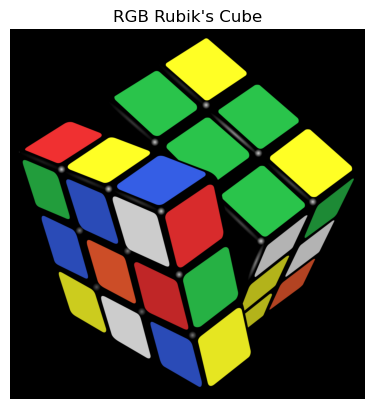

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.title("RGB Rubik's Cube")
plt.show()

#### `cv2.cvtColor(src, code)`
This method is used to convert an image from one color space to another. We'll work with more color spaces later on.
##### Parameters
**src**: Source image, a numpy array.
**code**: It specifies the TO and FROM for the conversion of color space. It follows the pattern `sourceCode2destinationCode`.
##### Returns
This method returns the converted image as specified in the code.

##### Codes

Codes belong to the enumeration `cv::ColorConversionCodes`. Some of the several codes available are:

| Code           | `int` value | Result                                                                   |
| :------------- | :---------: | :----------------------------------------------------------------------- |
| COLOR_BGR2BGRA |      0      | Add alpha channel to RGB or BGR image                                    |
| COLOR_RGB2RGBA |      0      | Add alpha channel to RGB or BGR image                                    |
| COLOR_BGRA2BGR |      1      | Remove alpha channel from RGB or BGR image                               |
| COLOR_RGBA2RGB |      1      | Remove alpha channel from RGB or BGR image                               |
| COLOR_BGR2RGBA |      2      | Convert between RGB and BGR color spaces (with or without alpha channel) |
| COLOR_RGBA2BGR |      3      | Convert between RGB and BGR color spaces (with or without alpha channel) |
| COLOR_BGR2GRAY |      6      | Convert between BGR and grayscale                                        |
| COLOR_RGB2GRAY |      7      | Convert between RGB and grayscale                                        |
| COLOR_BGR2HSV  |     40      | Convert BGR to HSV (hue saturation value)                                |
| COLOR_RGB2HSV  |     41      | Convert RGB to HSV (hue saturation value)                                |

All codes have their reverse conversions too (RGBA**2**BGRA <-> BGRA**2**RGBA) which can be obtained easily by interchanging the sourceCode with the destinationCode as shown in the example above

The full list of codes and its corresponding details can be found by following [this link](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html)

#### `cv2.imwrite(filename, image)`
This method is used to save an image to any storage device.
##### Parameters
**filename**: A string representing the file name. The filename must include image format like .jpg, .png, etc.  
**image**: It is the image that is to be saved.
##### Returns
It returns true if image is saved successfully.

**Note: Running the below code will save the image in your local directory**

In [6]:
cv2.imwrite('new_rubiks.jpg', img)

True

#### Caution when using `cv2.imwrite()`:  
`cv2.imwrite()` saves the image assuming that the image is in **BGR** format. This can give unexpected results if it is used with `cv2.cvtColor()`. When you need to save image in a format **other than BGR** or single channel color spaces(like Grayscale) please use `plt.savefig()` which we will be learning ahead under Matplotlib.  
    To illustrate this further, shown below is some examples of **WRONG USAGE** where `cv2.imwrite()` is used after changing color spaces using `cv2.cvtColor()`:    
    
| Converted to |                            Output                            |
| :----------: | :----------------------------------------------------------: |
|     BGR      | <img src="./Assets/wrong_write_BGR.png" style="width: 20%;"> |
|     RGB      | <img src="./Assets/wrong_write_RGB.png" style="width: 20%;"> |
|     HSV      | <img src="./Assets/wrong_write_HSV.png" style="width: 20%;"> |
    
**Therefore use `cv2.imwrite()` to save BGR format only**.

#### `cv2.imshow(window_name, image)`
##### Parameters
**window_name**: A string representing the name of the window in which image to be displayed. This will be displayed on the Title Bar of the window.   
**image**: It is the image that is to be displayed.
##### Returns
It doesn’t return anything.

**Note: We don't use this command when using a Jupyter Notebook (NB). Instead we use Matplotlib to display images**.

#### `cv2.VideoCapture() `
##### Parameters
Pass 0 to use the default webcam, Pass 1 to use an external webcam
##### Returns
Returns a *video capture object*

#### `cv2.waitKey(delay)`
##### Parameters
**delay**: Delay in milliseconds. 0 is the special value that means *infinitely*.
##### Returns
Returns ASCII value of key pressed (32 bit integer)  

If you've used ASCII you might wonder how ASCII (8 bit) can be compared with 32 bit integer.  
Since you use only the last 8 bits from the 32 bits, we do a bitwise AND operation **&**  
Let's see an example with this in action

```py
if cv2.waitKey(0) & 0xFF == ord('q'):
    # Perform action here
```

Here we extract the last 8 bits using the **&** operation and then compare it with the ASCII value of q.  
*Note: The ord() python function returns an integer representing the Unicode character.*

#### `cv2.destroyWindow(name)`
This function destroys the GUI windows opened by OpenCV which has the name specified
##### Parameters
**name**: Name of the window created
##### Returns
Returns ASCII value of key pressed

#### `cv2.destroyAllWindows()`
This function destroys all of the opened GUI windows opened by OpenCV.
##### Parameters
**None**
##### Returns
Returns ASCII value of key pressed